### (0 баллов) Считываем данные

In [ ]:
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [ ]:
X = dataset['data']
y = dataset['target']

In [ ]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))

Сдвиг=36.73146277462374
Массив коэффициентов=[-1.19886262e-01  3.99134691e-02  2.12938504e-02  2.77565167e+00
 -1.85854960e+01  3.75579160e+00  4.57076424e-03 -1.47064595e+00
  3.11878023e-01 -1.18109903e-02 -9.47556337e-01  1.03287982e-02
 -5.50096256e-01]


In [ ]:
y_pred = reg.predict(X_test)
print(y_pred[:10])
print(y_test[:10])

[29.3639579  36.18916482 14.05923305 24.76681233 18.79788306 23.24853399
 17.67925163 13.52689687 23.47852891 20.64157306]
[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8]


### (2 балл) Валидация результата

Напишите свою функцию MSE и посчитайте своей результат на тестовой части.

In [ ]:
def MSE(y_real, y_pred):
  return np.sum((y_real - y_pred) ** 2) / len(y_pred)

In [ ]:
print(MSE(y_test,y_pred))

14.99585287658254


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [ ]:
y_train[:] = y_train.mean()
#print(y_train[:10])

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(MSE(y_test, y_pred))

65.0080263111162


По сравнению с наивным алгоритмом, результат LReg значительно лучше.

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

14.775296466176155


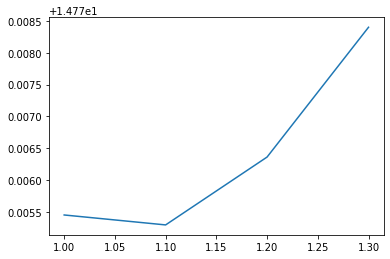

In [ ]:
from sklearn.linear_model import Ridge

mse_data = []
lambdas = np.arange(1.0,1.4,0.1)

for i in lambdas:
  reg = Ridge(alpha=i).fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  mse_data.append(MSE(y_pred,y_test))

plt.plot(lambdas, mse_data)
print(min(mse_data))

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка?

Значение изменилось в лучшую сторону, но не так сильно, как могло бы быть. Всего на 0.2.

Наименьшая ошибка достигается при alpha = 1.1 и она равна 14.78